In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

### Loading previously Wrangled dataset

In [51]:
df_cr = pd.read_csv('C:/Users/M.S.Chandrashekar/Desktop/Python/Kaggle_DS/archive/cl_hr.csv')

df_cr.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,...,0,0,0,0,0,0,1,1.000000,0.210998,0.25
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,...,1,0,0,0,0,0,1,0.736842,0.009340,1.00
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,...,1,0,0,0,0,0,1,0.210526,0.210998,0.00
3,3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,...,1,0,1,0,0,0,0,0.000000,0.210998,0.00
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,...,0,0,0,0,0,0,1,1.000000,0.009340,1.00


In [52]:
df_cr = df_cr.drop('Unnamed: 0', axis = 1)

In [53]:
df_cr.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target', 'F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0',
       'rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N',
       'mj_dp_O', 'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl'],
      dtype='object')

In [54]:
df_cr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,...,0,0,0,0,0,0,1,1.000000,0.210998,0.25
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,75.0,...,1,0,0,0,0,0,1,0.736842,0.009340,1.00
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,1,0,0,0,0,0,1,0.210526,0.210998,0.00
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,1,NaN,...,1,0,1,0,0,0,0,0.000000,0.210998,0.00
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,75.0,...,0,0,0,0,0,0,1,1.000000,0.009340,1.00


### Dataframe with Onehot encoded Feature list

In [144]:
feature = ['city_development_index','F', 'M', 'O', 'EU_2', 'EU_1', 'EU_0','rel_exp_1', 'rel_exp_0', 'mj_dp_A', 'mj_dp_B', 'mj_dp_H', 'mj_dp_N', 'mj_dp_O', 'mj_dp_S', 'exp_scale', 'compsize_scale', 'lst_nj_scl']

X_df = df_cr[feature]

y = df_cr['target']

X_df.describe()

,city_development_index,F,M,O,EU_2,EU_1,EU_0,rel_exp_1,rel_exp_0,mj_dp_A,mj_dp_B,mj_dp_H,mj_dp_N,mj_dp_O,mj_dp_S,exp_scale,compsize_scale,lst_nj_scl
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,0.064621,0.925410,0.009970,0.196106,0.062533,0.741361,0.719908,0.280092,0.013206,0.017069,0.034920,0.011640,0.019887,0.903278,0.469736,0.233893,0.451652
std,0.123362,0.245861,0.262736,0.099352,0.397060,0.242127,0.437898,0.449056,0.449056,0.114159,0.129530,0.183582,0.107262,0.139617,0.295587,0.340814,0.319631,0.342017
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.740000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.157895,0.009340,0.250000
50%,0.903000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.421053,0.210998,0.250000
75%,0.920000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.789474,0.210998,0.750000
max,0.949000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection with SelectKBest (f_classif / ANOVA)

In [180]:
from sklearn.feature_selection import SelectKBest

In [181]:
slkbst = SelectKBest()
feat_ = slkbst.fit(X = X_df, y = y)
print(feat_.scores_,'\n', feat_.pvalues_)

[2.53171622e+03 1.38202238e+00 1.56507442e+00 1.59302010e-01
 4.41961675e+02 5.12254087e-02 3.66801294e+02 3.21265400e+02
 3.21265400e+02 2.17649841e+00 3.31108650e-01 5.51493047e+00
 8.85691858e-03 7.00723576e-01 2.00152796e+00 6.23203371e+02
 1.15166626e+00 1.34319090e+02] 
 [0.00000000e+000 2.39771573e-001 2.10939051e-001 6.89804403e-001
 5.04458333e-097 8.20946942e-001 5.31800211e-081 2.93363837e-071
 2.93363837e-071 1.40149406e-001 5.65013762e-001 1.88649325e-002
 9.25021805e-001 4.02551112e-001 1.57156985e-001 2.18110342e-135
 2.83214132e-001 5.90160277e-031]


In [182]:
print(X_df.shape)
X_df_new = slkbst.transform(X_df)
X_df_new.shape

(19158, 18)


(19158, 10)

In [246]:
feat_scores = pd.Series(feat_.scores_.T)
feat_pvalues = pd.Series(feat_.pvalues_.T)
feature_list = pd.Series(feature)

score_dict = dict({"Feature": feature_list, "Scores": feat_scores, "p_values": feat_pvalues})


In [247]:
slkbst_score_df = pd.DataFrame( data = score_dict)
slkbst_score_df                               

,Feature,Scores,p_values
0,city_development_index,2531.716218,0.000000e+00
1,F,1.382022,2.397716e-01
2,M,1.565074,2.109391e-01
3,O,0.159302,6.898044e-01
4,EU_2,441.961675,5.044583e-97
5,EU_1,0.051225,8.209469e-01
6,EU_0,366.801294,5.318002e-81
7,rel_exp_1,321.265400,2.933638e-71
8,rel_exp_0,321.265400,2.933638e-71
9,mj_dp_A,2.176498,1.401494e-01


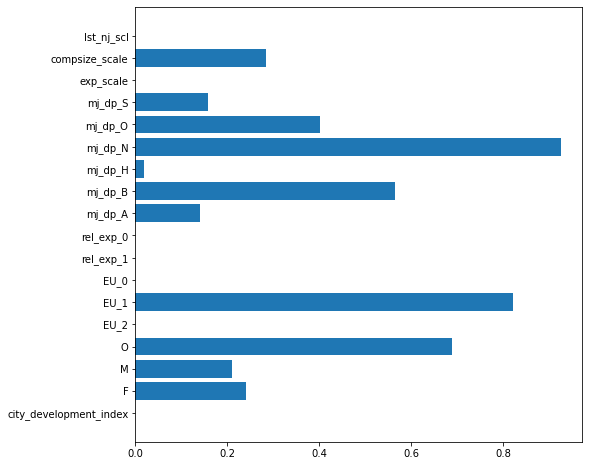

In [249]:
plt.figure(figsize=(8,8))
plt.barh(y = slkbst_score_df['Feature'] , width = slkbst_score_df['p_values'])
plt.show()

### Recursive Feature Selection

In [252]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [258]:
svc = SVC(kernel='linear')
min_feat_select = 1

rfecv = RFECV(estimator = svc, step =1, cv = 5, scoring='accuracy', min_features_to_select = min_feat_select)
rfecv.fit(X_df, y)

RFECV(cv=5, estimator=SVC(kernel='linear'), scoring='accuracy')

In [259]:
print("Optimal num of features", rfecv.n_features_)

Optimal num of features 1


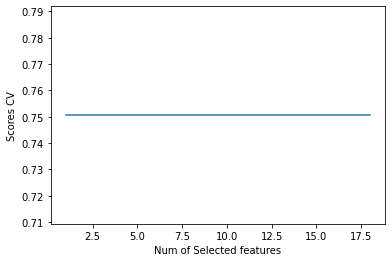

In [263]:
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.xlabel("Num of Selected features")
plt.ylabel("Scores CV")
plt.show()

In [265]:
rfecv.ranking_

array([ 1, 18, 16,  6, 10,  4, 17,  7,  3, 11, 13, 12,  9,  2, 15,  8,  5,
       14])

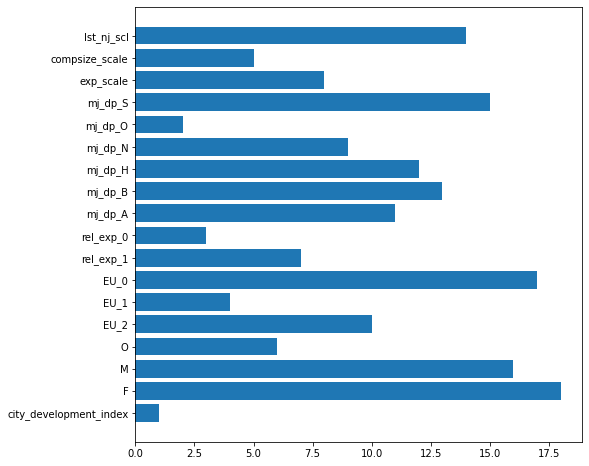

In [267]:
plt.figure(figsize=(8,8))
plt.barh(y = slkbst_score_df['Feature'] , width = rfecv.ranking_)
plt.show()

In [276]:
rfecv_ranking = pd.Series(rfecv.ranking_)
rfecv_ranking.shape


(18,)

In [278]:
slkbst_score_df['Recursive Feat CV Ranking'] = rfecv_ranking
slkbst_score_df

,Feature,Scores,p_values,Recursive Feat CV Ranking
0,city_development_index,2531.716218,0.000000e+00,1
1,F,1.382022,2.397716e-01,18
2,M,1.565074,2.109391e-01,16
3,O,0.159302,6.898044e-01,6
4,EU_2,441.961675,5.044583e-97,10
5,EU_1,0.051225,8.209469e-01,4
6,EU_0,366.801294,5.318002e-81,17
7,rel_exp_1,321.265400,2.933638e-71,7
8,rel_exp_0,321.265400,2.933638e-71,3
9,mj_dp_A,2.176498,1.401494e-01,11


In [296]:
feature_list_sorted = slkbst_score_df.sort_values('Recursive Feat CV Ranking')
feature_list_sorted

,Feature,Scores,p_values,Recursive Feat CV Ranking
0,city_development_index,2531.716218,0.000000e+00,1
13,mj_dp_O,0.700724,4.025511e-01,2
8,rel_exp_0,321.265400,2.933638e-71,3
5,EU_1,0.051225,8.209469e-01,4
16,compsize_scale,1.151666,2.832141e-01,5
3,O,0.159302,6.898044e-01,6
7,rel_exp_1,321.265400,2.933638e-71,7
15,exp_scale,623.203371,2.181103e-135,8
12,mj_dp_N,0.008857,9.250218e-01,9
4,EU_2,441.961675,5.044583e-97,10


In [320]:
feat_list = feature_list_sorted['Feature'][0:10]
feat_list_ind = np.array(feat_list.index)
print(type(feat_list_ind))

<class 'numpy.ndarray'>


### New reduced Feature list Dataframe

In [323]:
X_new = X_df.iloc[:,list(feat_list_ind)]
X_new

,city_development_index,mj_dp_O,rel_exp_0,EU_1,compsize_scale,O,rel_exp_1,exp_scale,mj_dp_N,EU_2
0,0.920,0,0,0,0.210998,0,1,1.000000,0,0
1,0.776,0,1,0,0.009340,0,0,0.736842,0,0
2,0.624,0,1,0,0.210998,0,0,0.210526,0,1
3,0.789,0,1,0,0.210998,0,0,0.000000,0,0
4,0.767,0,0,0,0.009340,0,1,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,1,0,0.210998,0,0,0.684211,0,0
19154,0.920,0,0,0,0.210998,0,1,0.684211,0,0
19155,0.920,0,0,0,0.009340,0,1,1.000000,0,0
19156,0.802,0,0,0,0.099400,0,1,0.000000,0,0


### Applying Decision Tree  and check score improvement after Feature selection

In [326]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [324]:
dtc = DecisionTreeClassifier()

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y , test_size = 0.4, stratify = y)

In [329]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [330]:
y_pred_dtc = dtc.predict(X_test)

In [331]:
y_pred_dtc_acc = accuracy_score(y_test, y_pred_dtc)
y_pred_dtc_acc

0.7420407098121086

In [334]:
y_pred_dtc_clf = classification_report(y_test, y_pred_dtc)
print(y_pred_dtc_clf)

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      5753
         1.0       0.48      0.44      0.46      1911

    accuracy                           0.74      7664
   macro avg       0.65      0.64      0.65      7664
weighted avg       0.73      0.74      0.74      7664



### Feature selection and model performance improvement

- By Applying Feature selection techniques (ANOVA, Recursive Feat selection)- we have reduced the number of features from 18 to 10 significant features based on p-values.

- Decision tree classifier model performance  has increase in accuracy score from (72% to 74.2 %) and improved recall score for class 1(attrition) of 44%.